In [1]:
#dataset bank.csv 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
#to display the no. of records in given dataset
df.shape

(11162, 17)

In [5]:
#check null values in given dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [7]:
#separate Independent variable(input variable) X and dependent variable 
#Y(target/output)
X=df.drop("deposit",axis=1) #to store all inputs hold in X variable apart from
#deposit
Y=df["deposit"] 

In [8]:
#train_test_split()
from sklearn.model_selection import train_test_split

In [9]:
#Split our dataset in train test of 70% & 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
def create_model(model): #create_model() user defined function and passing
    #argument and return value
    model.fit(X_train,Y_train) #train the model
    y_pred=model.predict(X_test) #test the model Y_pred=1/(1+e-(X))
    print(classification_report(Y_test,y_pred))
    return model

In [11]:
from sklearn.metrics import classification_report

In [12]:
#BaseLine Model :  use Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

In [13]:
#Create the object of LogisticRegression class
lr=LogisticRegression()

In [14]:
#call function 
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.77      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349



In [15]:
#recall : .73 it is good but not better so we use second classification 
#algorithm DecisionTreeClassifier  (Without using data analysis manually)
#DecisionTreeClassifier : - Its gives the imp features from dataset to
#predict the o/p
from sklearn.tree import DecisionTreeClassifier

In [16]:
#create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier()  #by defualt gini index method used

In [17]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [18]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [19]:
dt1.feature_importances_ #to display Information gain of each input features

array([0.08364194, 0.03704444, 0.01827586, 0.01208467, 0.00084141,
       0.08264801, 0.04271758, 0.00520134, 0.06237754, 0.07562822,
       0.09635112, 0.35157894, 0.02196164, 0.04878723, 0.02505082,
       0.03580924])

In [20]:
#we visualize the tree
from sklearn import tree

In [21]:
'''features=X.columns
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)'''

'features=X.columns\nfig=plt.figure(figsize=(23,20))\n_=tree.plot_tree(dt1,feature_names=features,filled=True)'

In [22]:
#Reduced  the overfit  : -
'''How we reduced a overfitting by using Pruning Technique
pruning technique : means to cut the branches of tree(from bottom of tree) and
converts into small tree '''

'How we reduced a overfitting by using Pruning Technique\npruning technique : means to cut the branches of tree(from bottom of tree) and\nconverts into small tree '

In [23]:
'''Various types of pruning Technique 
   1.  First Pruning Technique : With the help of max_depth()
   2.  Second Pruning Technique : with the help of min_samples_leaf()'''

'Various types of pruning Technique \n   1.  First Pruning Technique : With the help of max_depth()\n   2.  Second Pruning Technique : with the help of min_samples_leaf()'

In [24]:
# 1. First Pruning Technique : With the help of max_depth()
#max_depth can not more than 8 in any dataset (datascientist)
#create object of DecisionTreeClassifier and pass parameter max_depth
dt2=DecisionTreeClassifier(max_depth=3)

In [25]:
#call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1760
           1       0.71      0.86      0.78      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.78      0.77      3349
weighted avg       0.78      0.77      0.77      3349



In [26]:
dt2.feature_importances_ #to display Information gain of each input features

array([0.03429936, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.13912344, 0.        ,
       0.        , 0.70308429, 0.        , 0.05817158, 0.        ,
       0.06532133])

In [27]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [28]:
'''features=X.columns
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)'''

'features=X.columns\nfig=plt.figure(figsize=(23,20))\n_=tree.plot_tree(dt2,feature_names=features,filled=True)'

In [29]:
#2.  Second Pruning Technique : with the help of min_samples_leaf()
#create object of DecisionTreeClassifier and pass parameter min_samples_leaf
#min_samples_leaf atleast 45-50 and more but not less than 45
dt3=DecisionTreeClassifier(min_samples_leaf=45)#gini index

In [30]:
#call function 
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [31]:
'''features=X.columns
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)'''

'features=X.columns\nfig=plt.figure(figsize=(23,20))\n_=tree.plot_tree(dt3,feature_names=features,filled=True)'

In [32]:
dt3.feature_importances_ #to display Information gain of each input features

array([4.39183499e-02, 4.88799764e-03, 0.00000000e+00, 1.97906367e-03,
       0.00000000e+00, 2.17487974e-02, 6.83293597e-02, 3.14324106e-03,
       1.05356626e-01, 5.05770235e-03, 1.09125894e-01, 4.96305781e-01,
       4.12091204e-04, 4.40661418e-02, 2.26653009e-02, 7.30036529e-02])

In [33]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [34]:
#method use entropy of decision tree
dt4=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=45)


In [35]:
#call function
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



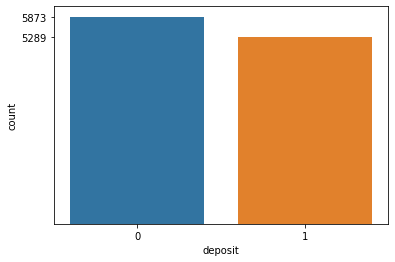

In [36]:
sns.countplot(data=df,x='deposit')
c=df["deposit"].value_counts()
plt.yticks(c)
plt.show()